In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
df = pd.read_excel('auto_complectations.xlsx')

In [3]:
df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

In [5]:
df['type_car'].unique()

array(['Седан класса C', 'Хэтчбек класса B', 'Седан класса D',
       'Универсал повышенной проходимости класса D', 'Универсал класса D',
       'Купе класса D', 'Хэтчбек класса D', 'Седан класса E',
       'Универсал класса E', 'Хэтчбек класса E', 'Седан класса F',
       'Большой кроссовер', 'Компактный кроссовер',
       'Среднеразмерный кроссовер', 'Купе класса C', 'Спорткупе',
       'Кабриолет с мягкой крышей', 'Спорткупе класса D',
       'Спортседан класса E', 'Родстер', 'Большой внедорожник',
       'Седан класса B', 'Хэтчбек класса A', 'Кроссовер класса B', 'Вэн',
       'Горячий хэтчбек класса C', 'Внедорожник класса B',
       'Среднеразмерный внедорожник', 'Хэтчбек класса C',
       'Универсал класса C', 'Спортседан класса D', 'Купе класса E',
       'Пикап', 'Горячий седан класса C', 'Минивэн', 'Компактвэн',
       'Универсал повышенной проходимости класса E'], dtype=object)

In [6]:
df['type_car'].nunique()

37

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Cadillac'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Citroen'),
  Text(5, 0, 'Genesis'),
  Text(6, 0, 'Infiniti'),
  Text(7, 0, 'Hyundai'),
  Text(8, 0, 'Honda'),
  Text(9, 0, 'Jaguar'),
  Text(10, 0, 'Jeep'),
  Text(11, 0, 'KIA'),
  Text(12, 0, 'Land Rover'),
  Text(13, 0, 'Lexus'),
  Text(14, 0, 'Mazda'),
  Text(15, 0, 'Mercedes-Benz'),
  Text(16, 0, 'Mitsubishi'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Opel'),
  Text(19, 0, 'Peugeot'),
  Text(20, 0, 'Renault'),
  Text(21, 0, 'Skoda'),
  Text(22, 0, 'Subaru'),
  Text(23, 0, 'Suzuki'),
  Text(24, 0, 'Toyota'),
  Text(25, 0, 'Volkswagen'),
  Text(26, 0, 'Volvo')])

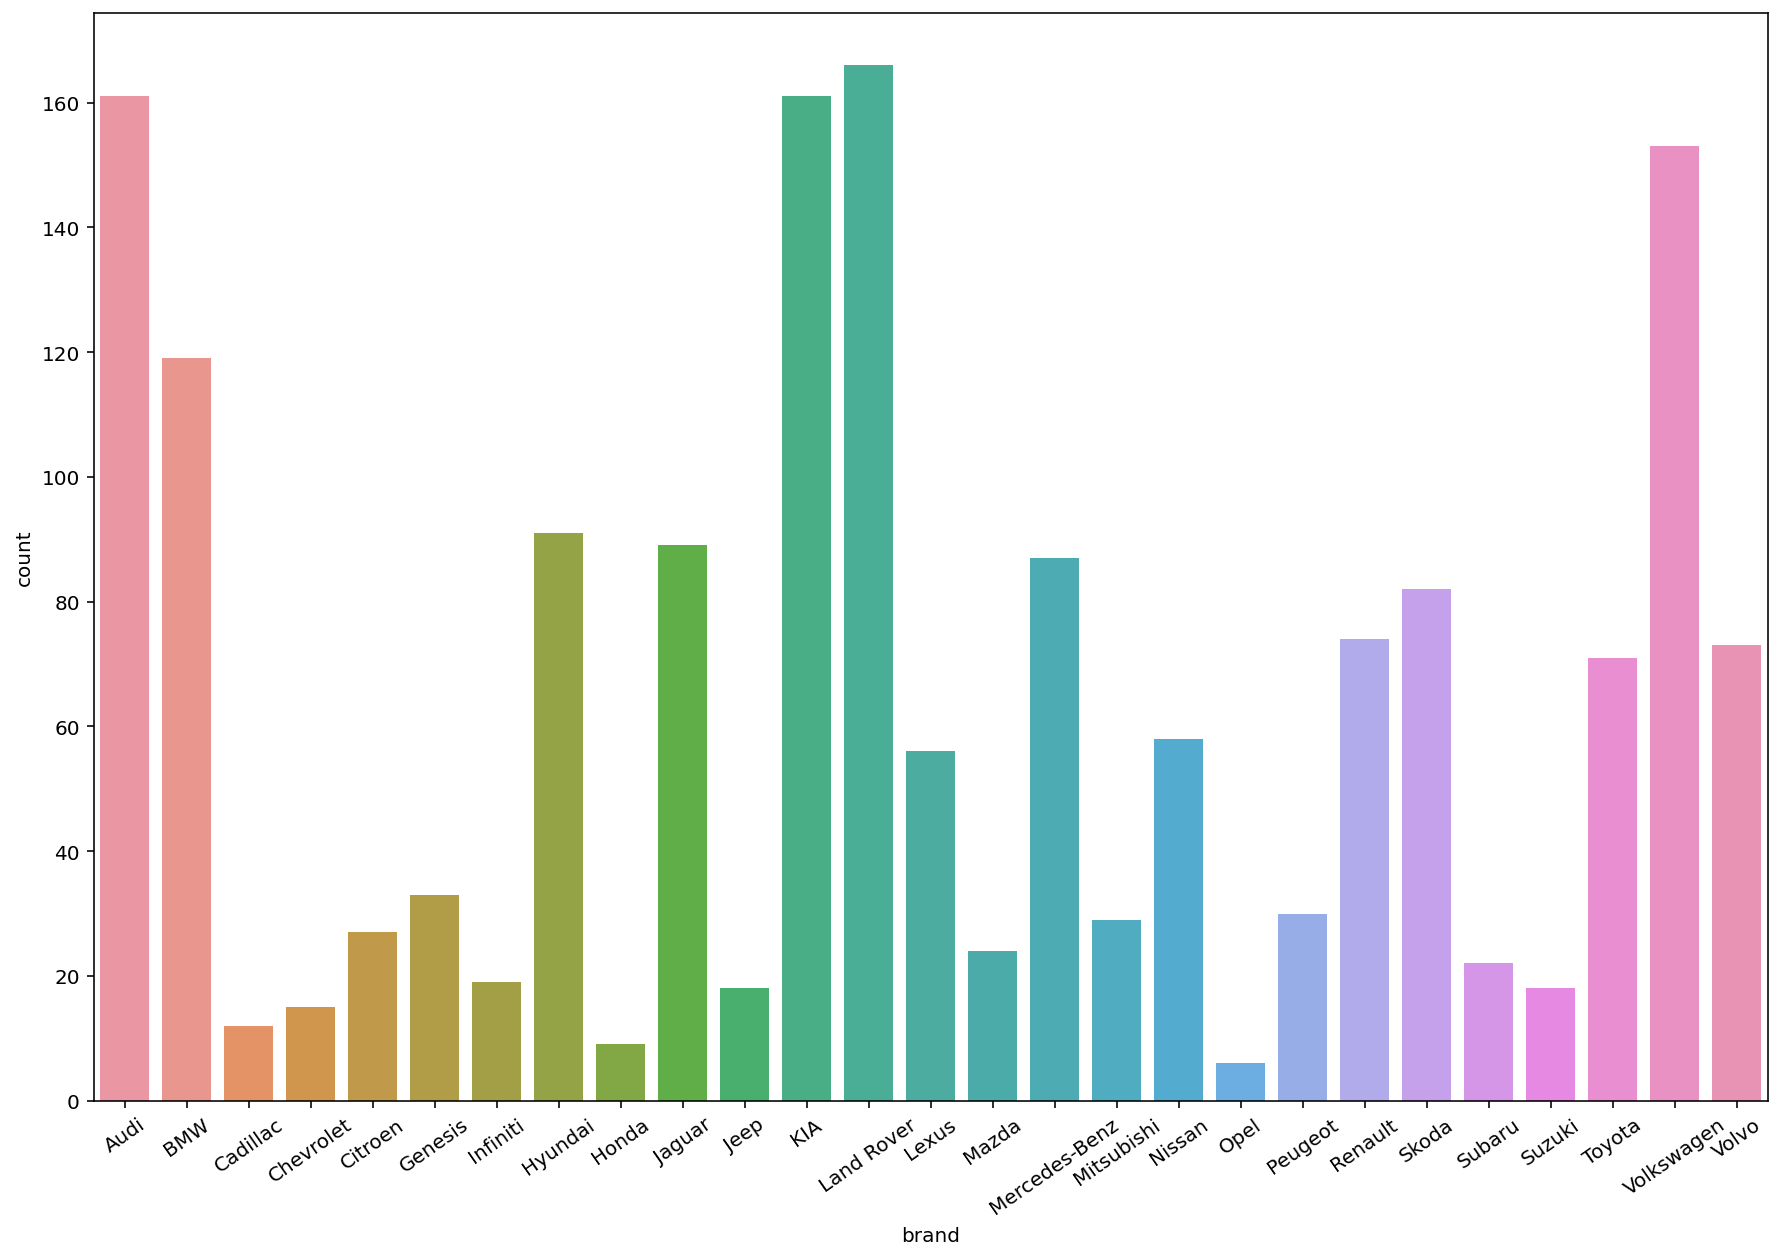

In [7]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(x=df['brand'])
plt.xticks(rotation=35)

In [8]:
conditions = [
    df['type_car'].str.contains('едан'),
    df['type_car'].str.contains('этчбек'),
    df['type_car'].str.contains('ниверсал'),
    df['type_car'].str.contains('упе'),
    df['type_car'].str.contains('россовер'),
    df['type_car'].str.contains('дорожник'),
    (df['type_car'].str.contains('эн')) | (df['type_car'].str.contains('Пикап')),
    (df['type_car'].str.contains('Кабриолет')) | (df['type_car'].str.contains('Родстер'))
    ]


values = ['Sedan', 'Hatchback', 'Wagon', 'Coupe', 'Crossover', 'SUV', 'Van', 'Convertible']

In [9]:
df['type_label'] = np.select(conditions, values)

In [10]:
df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,type_label
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг,Sedan
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг,Sedan
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг,Sedan
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг,Sedan
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг,Sedan


<AxesSubplot:xlabel='type_label', ylabel='count'>

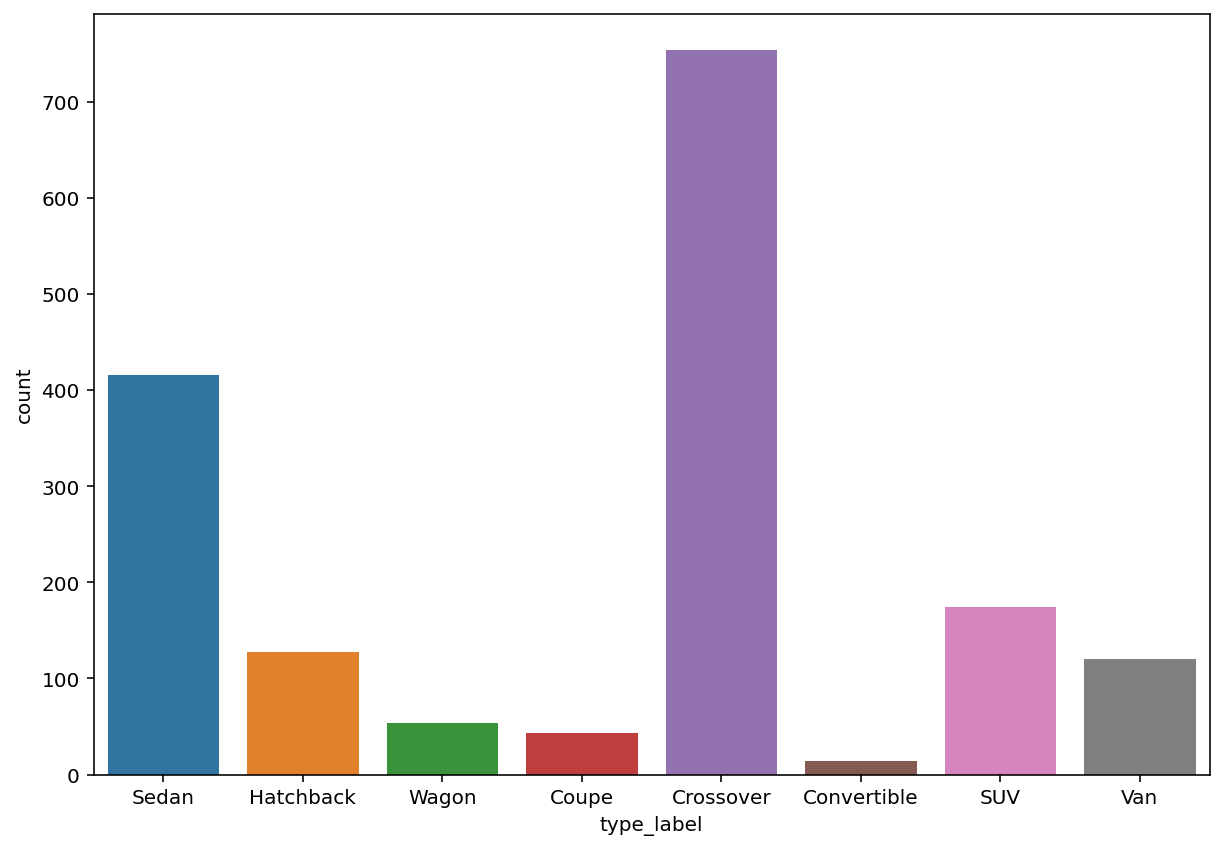

In [11]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x=df['type_label'])

<AxesSubplot:xlabel='doors', ylabel='count'>

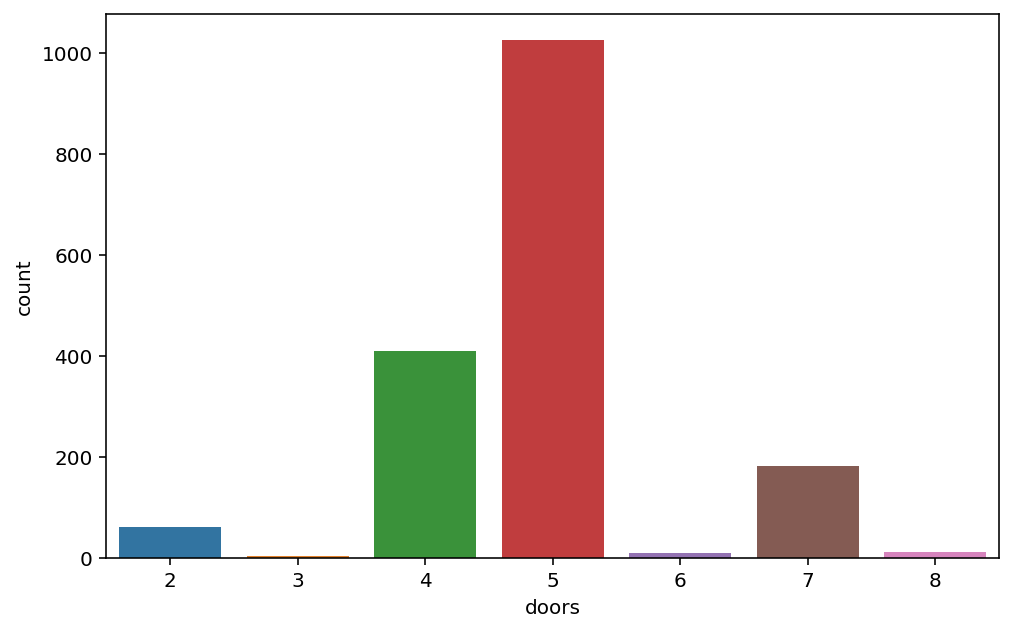

In [12]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x=df['doors'])

<AxesSubplot:xlabel='seats', ylabel='count'>

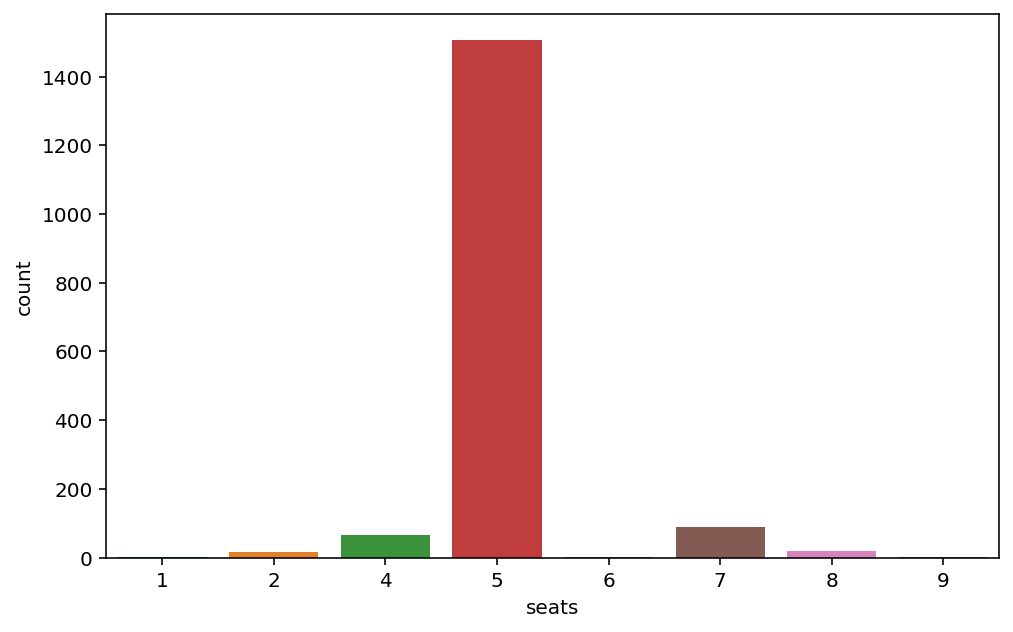

In [13]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x=df['seats'])

In [14]:
df['Мощность, л.с'] = df['Мощность'].str.extract('(\d+)').astype(int)

In [15]:
df['Тип двигатель'] = df['Двигатель'].apply(lambda x: x.split()[0])

In [16]:
df['Объем двигателя, см³'] = df['Двигатель'].str.extract('(\d+)').astype(int)

In [17]:
df['Крутящий момент двигателя, Н.м'] = df['Крутящий момент двигателя'].str.extract('(\d+)').astype(int)

In [18]:
df['Тип Коробка передач'] = df['Коробка передач'].apply(lambda x: x.split()[0])

In [19]:
df['Коробка передач (ступеней)'] = df['Коробка передач'].str.extract('(\d+)').astype(int)

In [20]:
df['Максимальная скорость, км/ч'] = df['Максимальная скорость'].str.extract('(\d+)').astype(int)

In [21]:
df['Расход топлива (л/100 км) город'] = df['Расход топлива (л/100 км)\nгород / трасса / смешанный'].apply(lambda x: x.split('/')[0])
df['Расход топлива (л/100 км) город'] = df['Расход топлива (л/100 км) город'].astype(float)

df['Расход топлива (л/100 км) трасса'] = df['Расход топлива (л/100 км)\nгород / трасса / смешанный'].apply(lambda x: x.split('/')[1])
df['Расход топлива (л/100 км) трасса'] = df['Расход топлива (л/100 км) трасса'].astype(float)


df['Расход топлива (л/100 км) смешанный'] = df['Расход топлива (л/100 км)\nгород / трасса / смешанный'].apply(lambda x: x.split('/')[2])
df['Расход топлива (л/100 км) смешанный'] = df['Расход топлива (л/100 км) смешанный'].astype(float)

In [22]:
df['Дорожный просвет, мм'] = df['Дорожный просвет'].str.extract('(\d+)').astype(int)

In [23]:
df['Разгон до сотни, секунды'] = df['Разгон до сотни'].apply(lambda x: x.split()[0])
df['Разгон до сотни, секунды'].replace('нет', '0', inplace=True)
df['Разгон до сотни, секунды'] = df['Разгон до сотни, секунды'].astype(float)

In [24]:
df['Габариты (длина)'] = df['Габариты (длина × ширина × высота)'].apply(lambda x: x.split('×')[0])
df['Габариты (длина)'] = df['Габариты (длина)'].astype(int)

df['Габариты (ширина)'] = df['Габариты (длина × ширина × высота)'].apply(lambda x: x.split('×')[1])
df['Габариты (ширина)'] = df['Габариты (ширина)'].astype(int)

df['Габариты (высота)'] = df['Габариты (длина × ширина × высота)'].apply(lambda x: x.split('×')[2])
df['Габариты (высота)'] = df['Габариты (высота)'].astype(int)

In [25]:
df['Колёсная база мм'] = df['Колёсная база'].str.extract('(\d+)').astype(int)

df['Объём багажника, л'] = df['Объём багажника'].str.extract('(\d+)').astype(int)

df['Объём багажника максимальный, л'] = df['Объём багажника максимальный'].str.extract('(\d+)').astype(int)

df['Объём топливного бака, л'] = df['Объём топливного бака'].str.extract('(\d+)').astype(int)

df['Масса автомобиля, кг'] = df['Масса автомобиля'].str.extract('(\d+)').astype(int)

In [26]:
df.drop(['type_car', 'Мощность', 'Крутящий момент двигателя', 'Коробка передач', 'Разгон до сотни',
              'Максимальная скорость', 'Расход топлива (л/100 км)\nгород / трасса / смешанный', 'Дорожный просвет',
             'Габариты (длина × ширина × высота)', 'Колёсная база', 'Объём багажника', 'Объём багажника максимальный',
             'Объём топливного бака', 'Масса автомобиля'], inplace=True, axis=1)

In [27]:
df.head()

,brand,model,complect,seats,doors,Двигатель,Привод,type_label,"Мощность, л.с",Тип двигатель,...,"Дорожный просвет, мм","Разгон до сотни, секунды",Габариты (длина),Габариты (ширина),Габариты (высота),Колёсная база мм,"Объём багажника, л","Объём багажника максимальный, л","Объём топливного бака, л","Масса автомобиля, кг"
0,Audi,A3 Sedan,1.4 TFSI 7AMT,5,4,бензиновый (1395 см³),передний,Sedan,150,бензиновый,...,165,8.2,4458,1796,1416,2637,425,880,50,1320
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,5,4,бензиновый (1395 см³),передний,Sedan,150,бензиновый,...,165,8.2,4458,1796,1416,2637,425,880,50,1320
2,Audi,A3 Sedan,2.0 TFSI 7AMT,5,4,бензиновый (1984 см³),передний,Sedan,190,бензиновый,...,165,6.8,4458,1796,1416,2637,425,880,50,1395
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,5,4,бензиновый (1984 см³),полный,Sedan,190,бензиновый,...,165,6.2,4458,1796,1416,2637,390,845,55,1465
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,5,4,бензиновый (1984 см³),передний,Sedan,190,бензиновый,...,165,6.8,4458,1796,1416,2637,425,880,50,1395


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   brand                                1703 non-null   object 
 1   model                                1703 non-null   object 
 2   complect                             1703 non-null   object 
 3   seats                                1703 non-null   int64  
 4   doors                                1703 non-null   int64  
 5   Двигатель                            1703 non-null   object 
 6   Привод                               1703 non-null   object 
 7   type_label                           1703 non-null   object 
 8   Мощность, л.с                        1703 non-null   int64  
 9   Тип двигатель                        1703 non-null   object 
 10  Объем двигателя, см³                 1703 non-null   int64  
 11  Крутящий момент двигателя, Н.м

<Figure size 720x576 with 0 Axes>

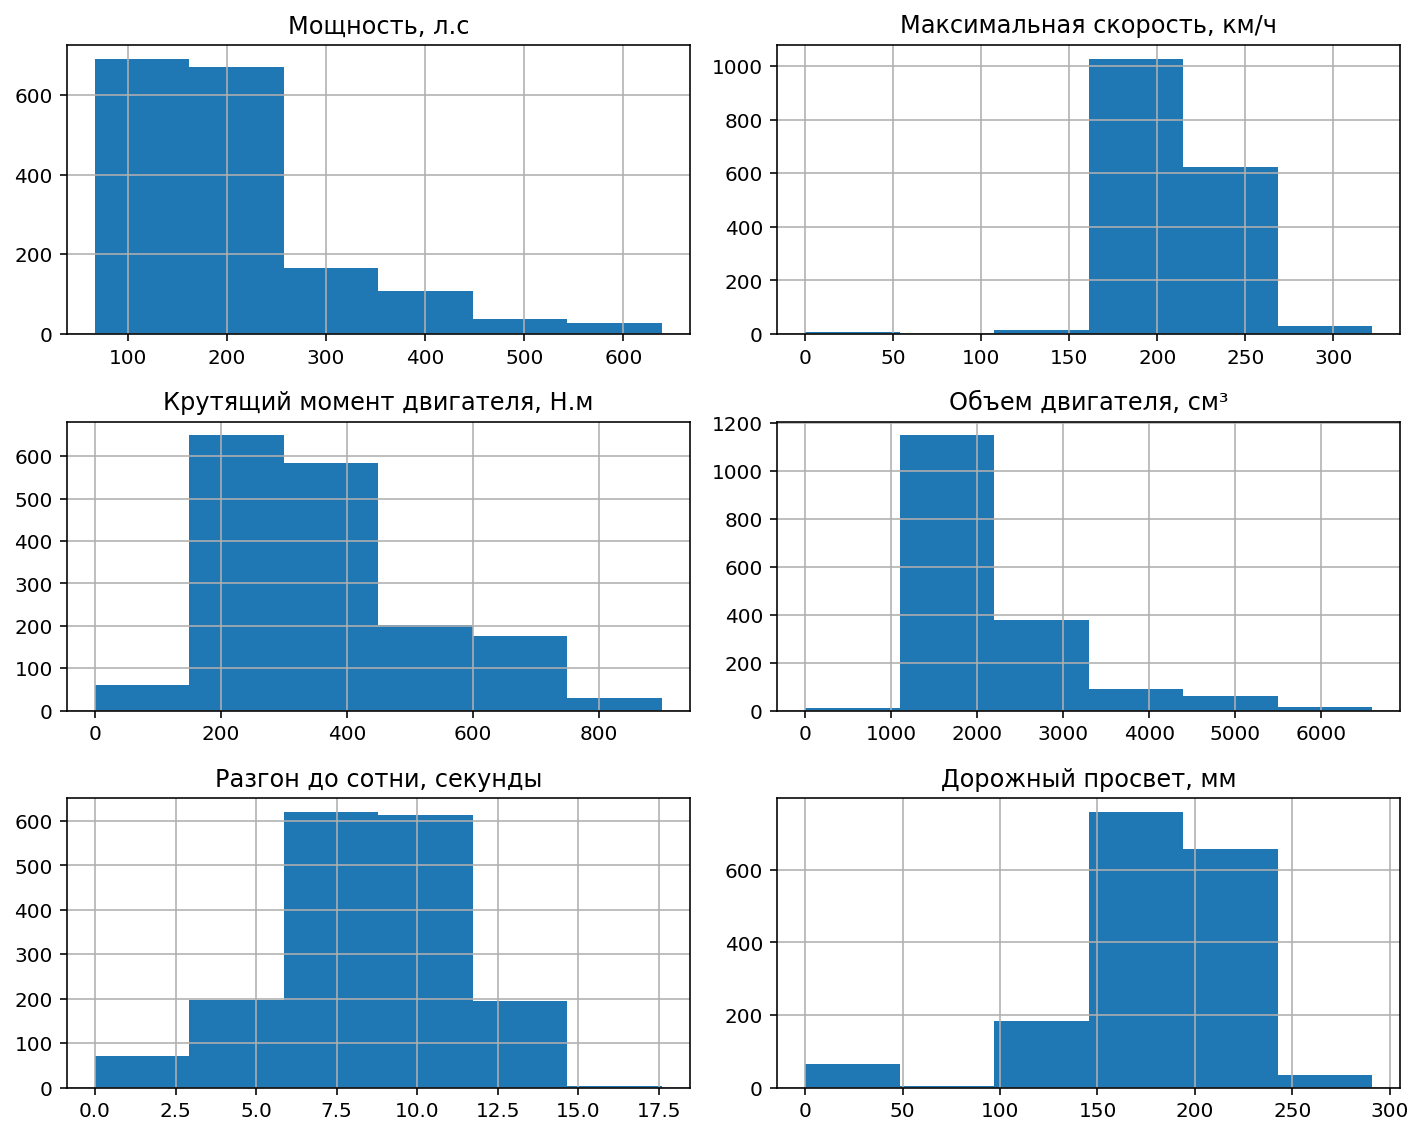

In [29]:
plt.figure(figsize=(10,8))
df[['Мощность, л.с','Максимальная скорость, км/ч','Крутящий момент двигателя, Н.м','Объем двигателя, см³',
    'Разгон до сотни, секунды', 'Дорожный просвет, мм']].hist(figsize=(10,8),bins=6)
plt.tight_layout()

<AxesSubplot:xlabel='Привод', ylabel='count'>

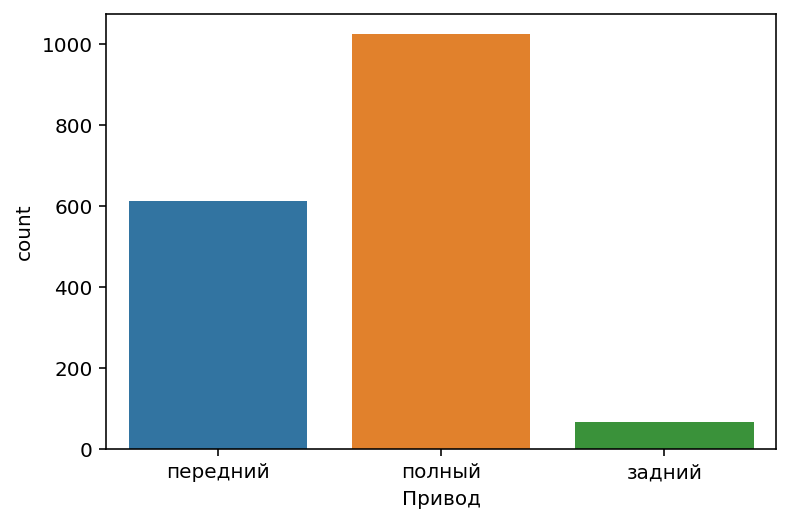

In [30]:
sns.countplot(x=df['Привод'])

<AxesSubplot:xlabel='Тип двигатель', ylabel='count'>

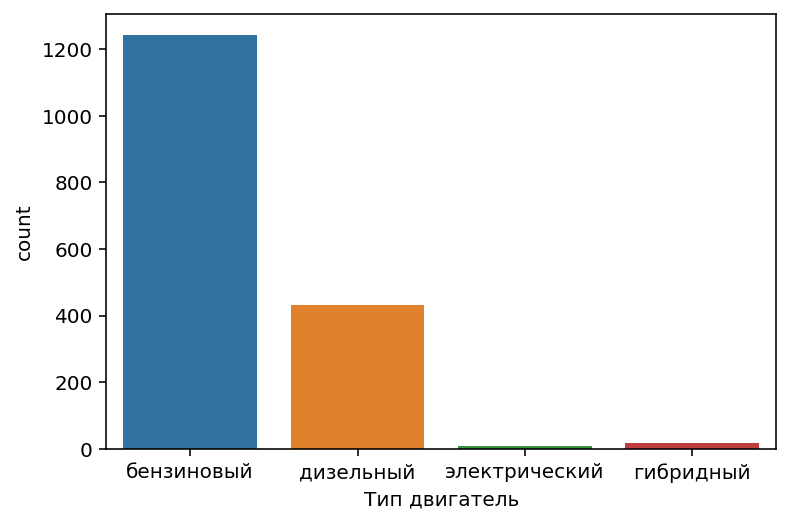

In [31]:
sns.countplot(x=df['Тип двигатель'])

<AxesSubplot:xlabel='Тип Коробка передач', ylabel='count'>

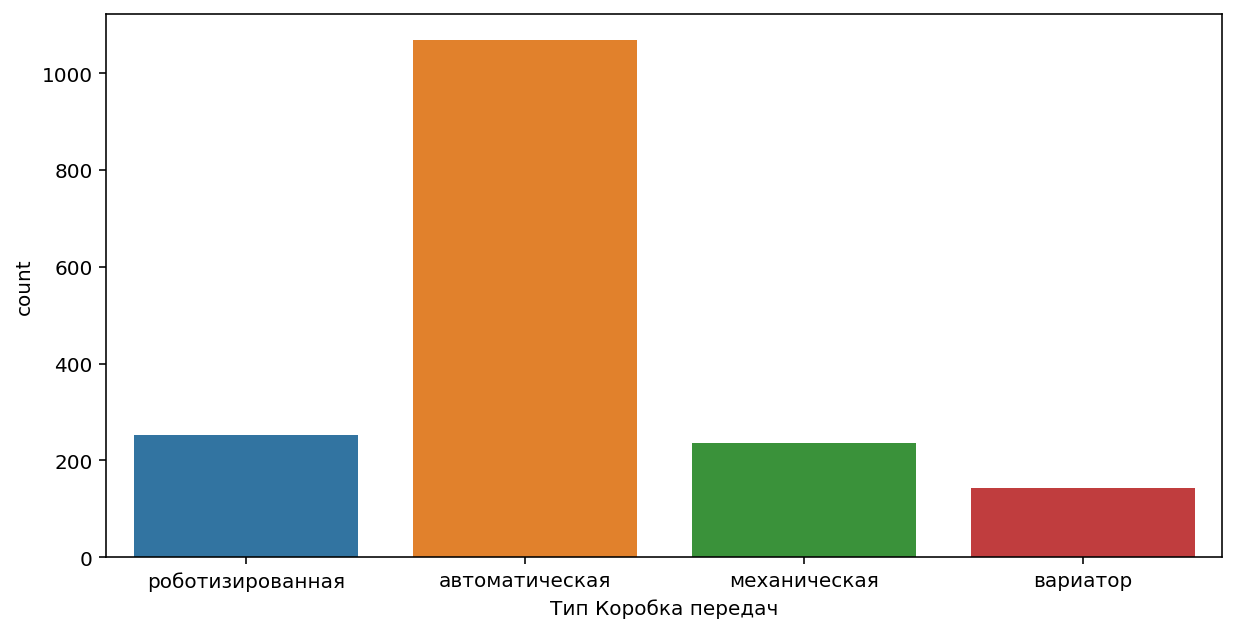

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Тип Коробка передач'])

<AxesSubplot:xlabel='Коробка передач (ступеней)', ylabel='count'>

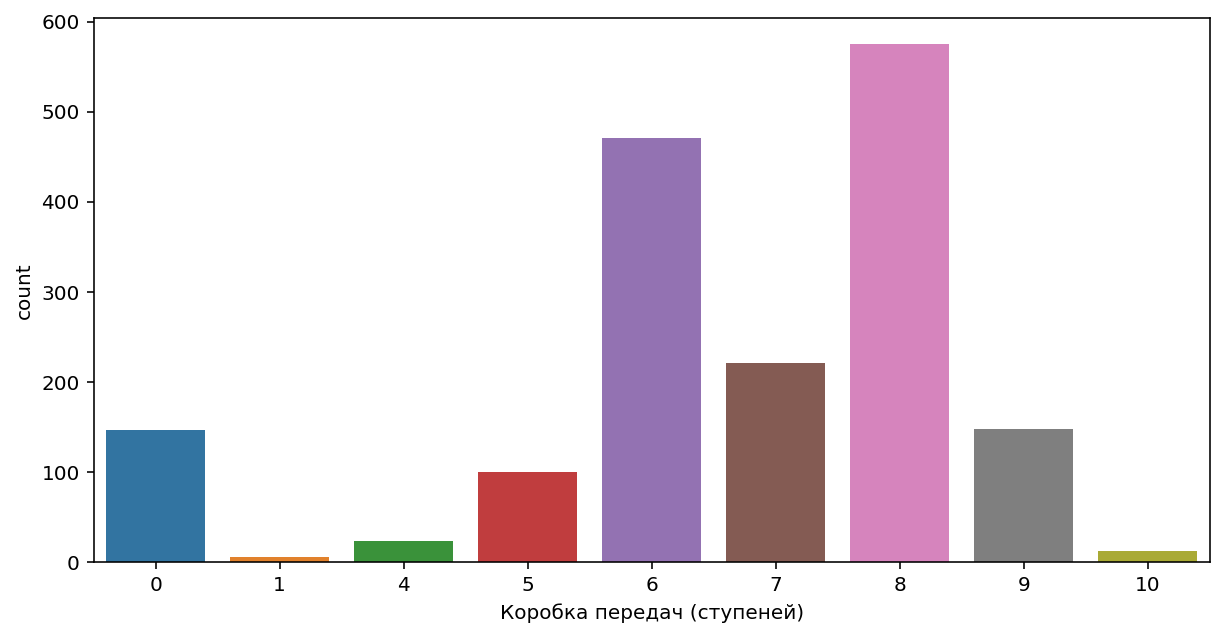

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Коробка передач (ступеней)'])

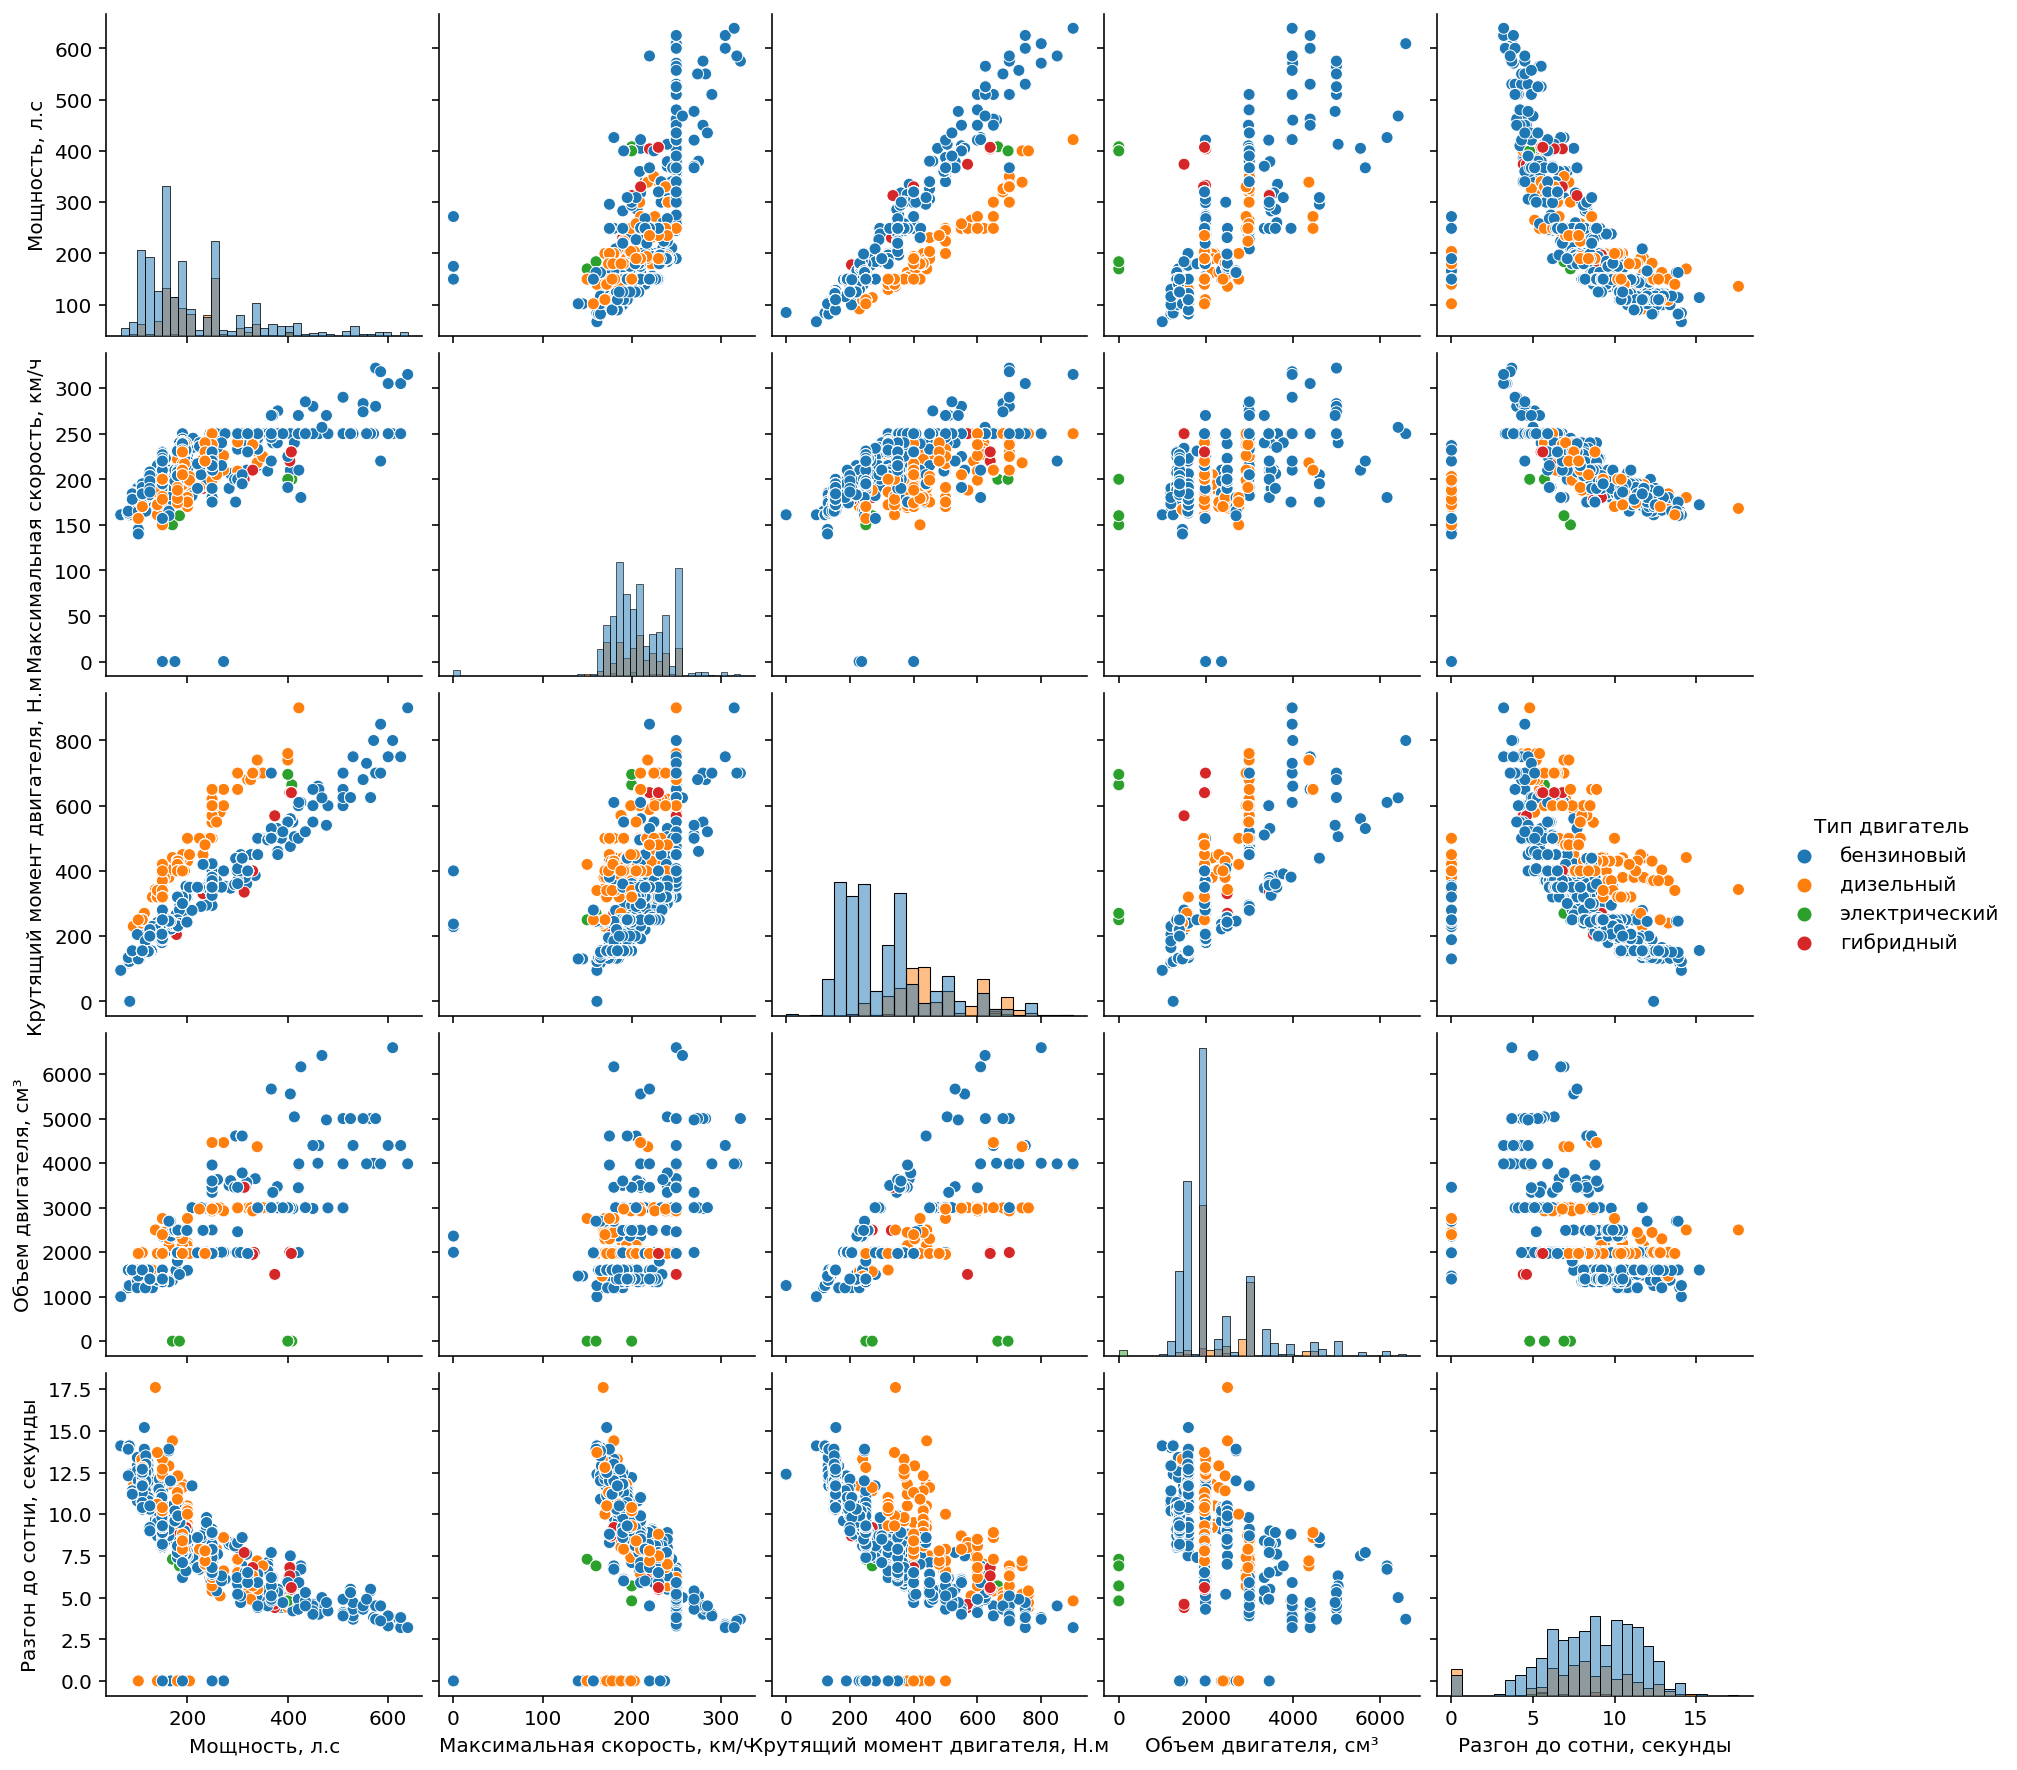

In [34]:
g = sns.pairplot(df[['Мощность, л.с','Максимальная скорость, км/ч','Крутящий момент двигателя, Н.м','Объем двигателя, см³',
                     'Разгон до сотни, секунды', 'Тип двигатель']], hue='Тип двигатель', diag_kind="hist")

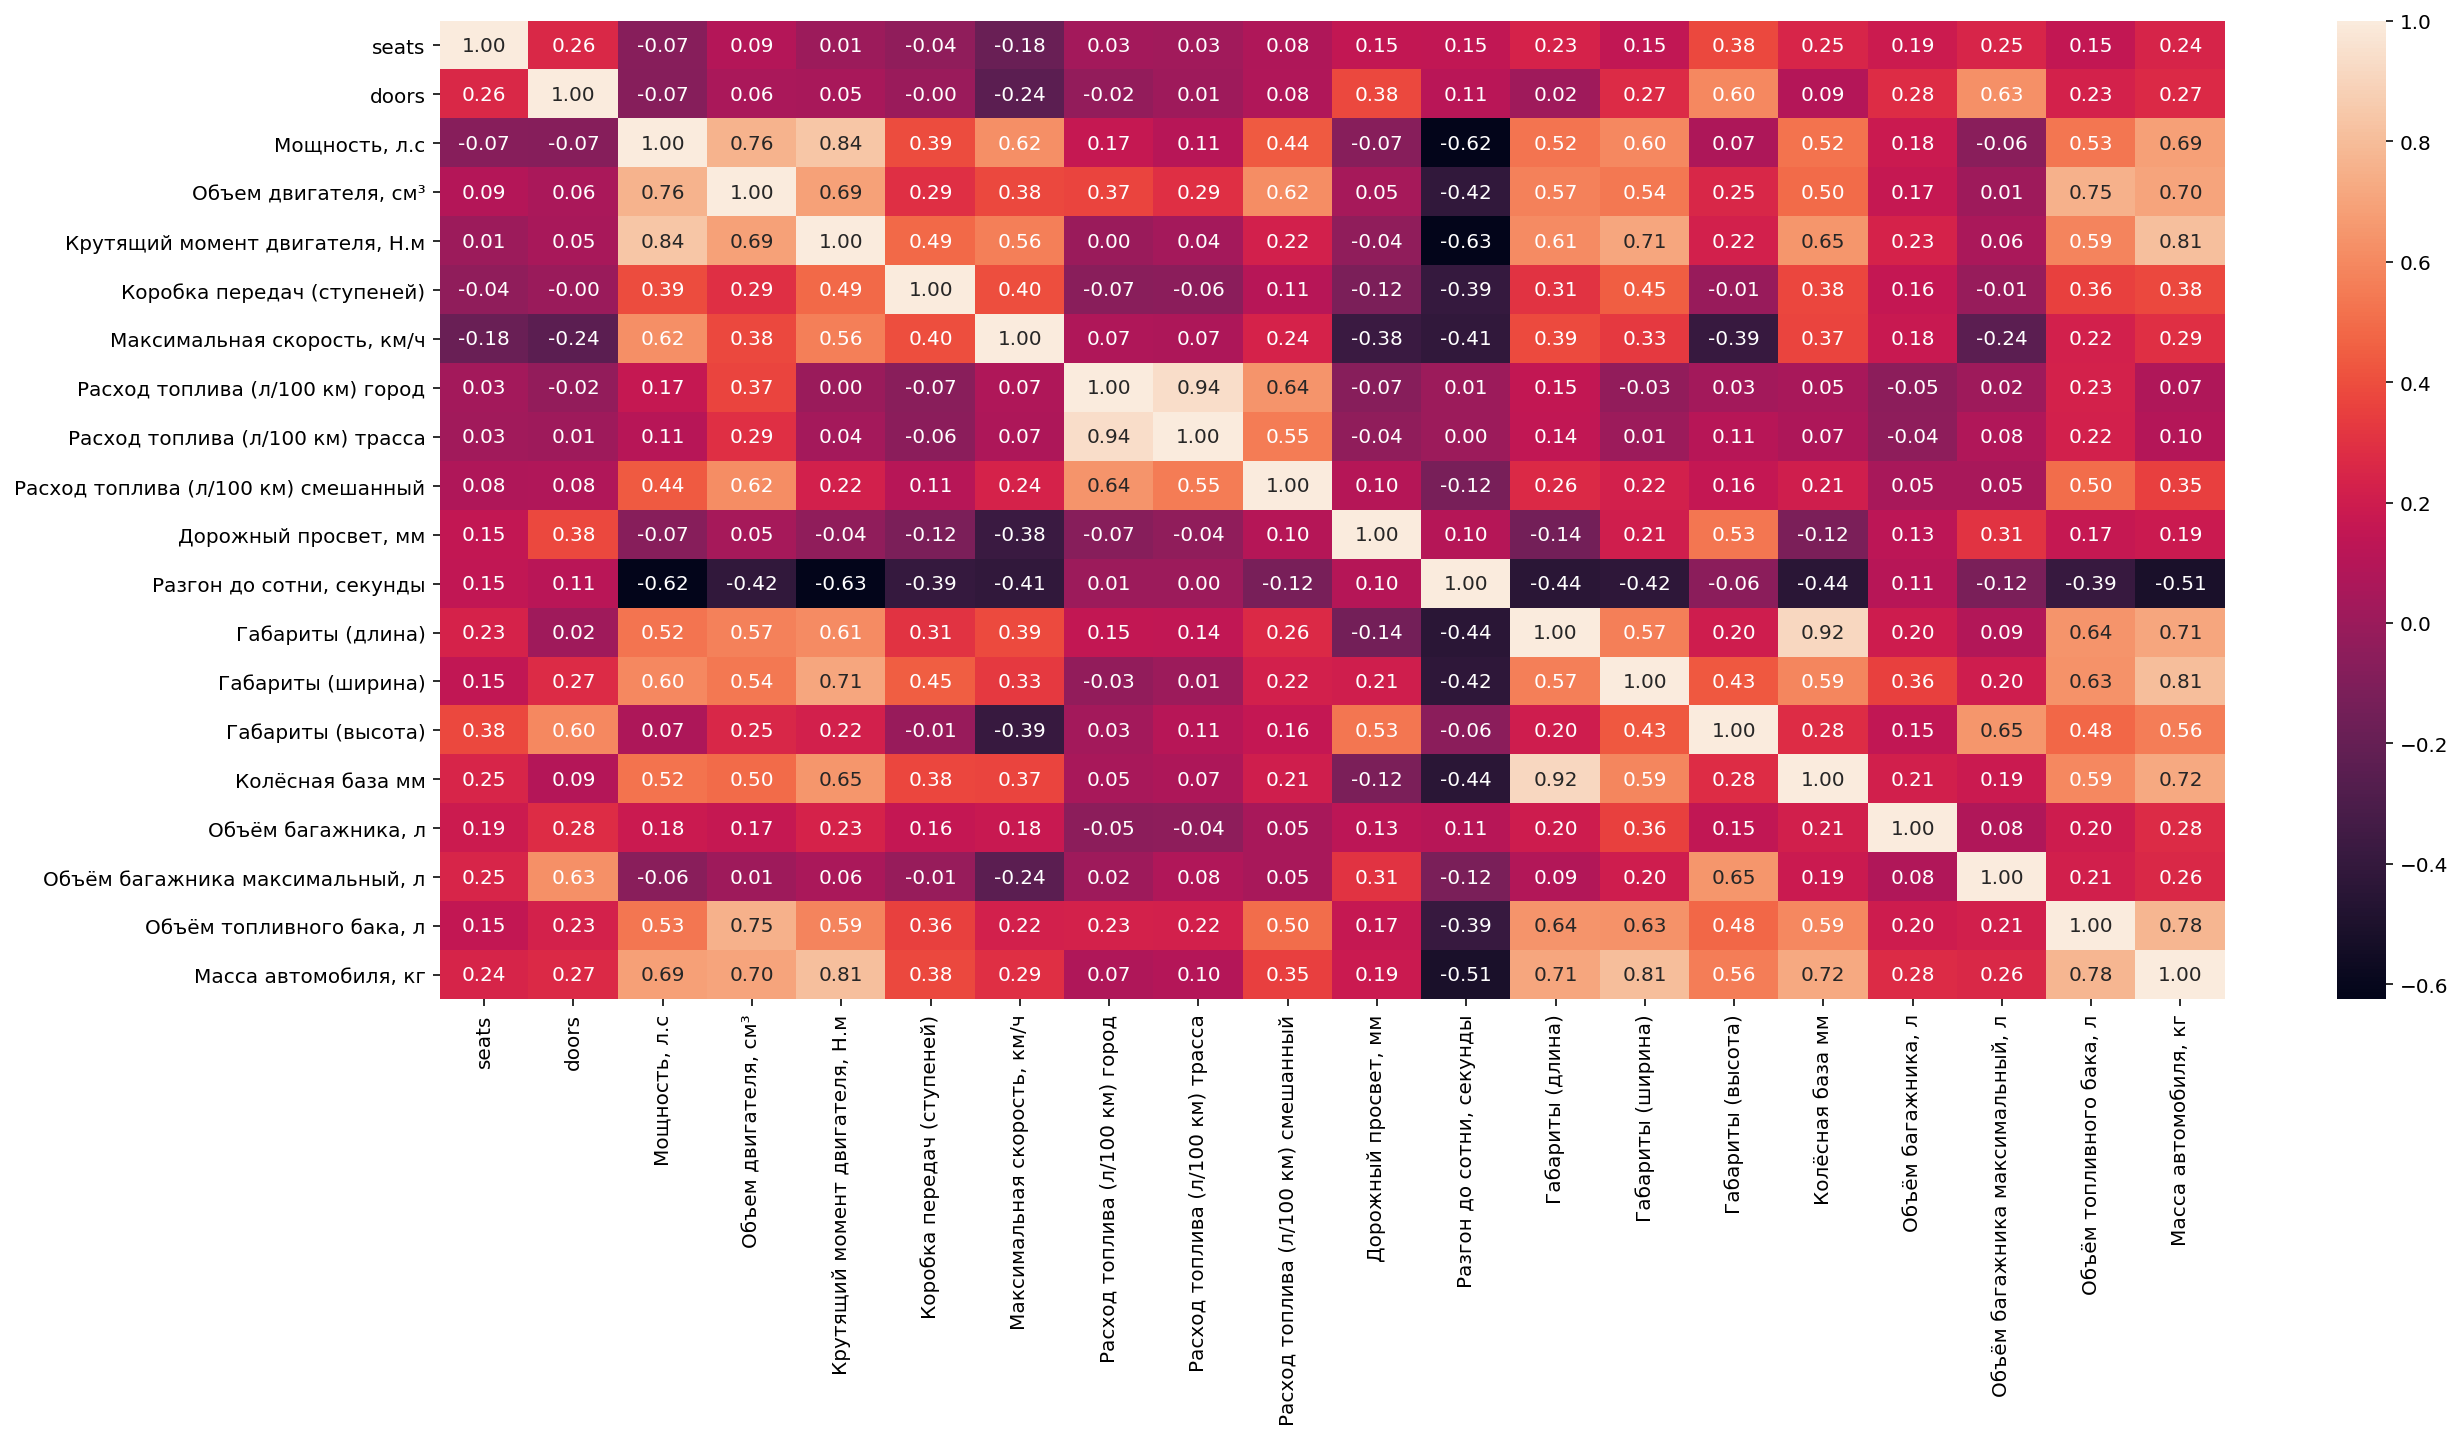

In [35]:
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

In [36]:
df['type_label'].unique()

array(['Sedan', 'Hatchback', 'Wagon', 'Coupe', 'Crossover', 'Convertible',
       'SUV', 'Van'], dtype=object)

In [37]:
dmap = {'Sedan':0, 'Hatchback':1, 'Wagon':2, 'Coupe':3, 'Crossover':4, 'Convertible':5,
       'SUV':6, 'Van':6}

In [38]:
df['target_label'] = df['type_label'].map(dmap)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   brand                                1703 non-null   object 
 1   model                                1703 non-null   object 
 2   complect                             1703 non-null   object 
 3   seats                                1703 non-null   int64  
 4   doors                                1703 non-null   int64  
 5   Двигатель                            1703 non-null   object 
 6   Привод                               1703 non-null   object 
 7   type_label                           1703 non-null   object 
 8   Мощность, л.с                        1703 non-null   int64  
 9   Тип двигатель                        1703 non-null   object 
 10  Объем двигателя, см³                 1703 non-null   int64  
 11  Крутящий момент двигателя, Н.м

In [40]:
Brand = pd.get_dummies(df['brand'], drop_first=True)
Привод_ = pd.get_dummies(df['Привод'], drop_first=True)
Тип_двигатель_ = pd.get_dummies(df['Тип двигатель'], drop_first=True)
Тип_Коробка_передач_ = pd.get_dummies(df['Тип Коробка передач'], drop_first=True)

In [41]:
df.drop(['brand','Привод','Тип двигатель','Тип Коробка передач', 'Двигатель', 'complect', 'model'], 
                     axis=1,inplace=True)

In [42]:
df = pd.concat([df, Brand, Привод_, Тип_двигатель_, Тип_Коробка_передач_],axis=1)

In [43]:
df.head()

,seats,doors,type_label,"Мощность, л.с","Объем двигателя, см³","Крутящий момент двигателя, Н.м",Коробка передач (ступеней),"Максимальная скорость, км/ч",Расход топлива (л/100 км) город,Расход топлива (л/100 км) трасса,...,Volkswagen,Volvo,передний,полный,гибридный,дизельный,электрический,вариатор,механическая,роботизированная
0,5,4,Sedan,150,1395,250,7,224,5.9,4.1,...,0,0,1,0,0,0,0,0,0,1
1,5,4,Sedan,150,1395,250,7,224,5.9,4.1,...,0,0,1,0,0,0,0,0,0,1
2,5,4,Sedan,190,1984,320,7,250,7.2,4.7,...,0,0,1,0,0,0,0,0,0,1
3,5,4,Sedan,190,1984,320,7,242,7.2,4.8,...,0,0,0,1,0,0,0,0,0,1
4,5,4,Sedan,190,1984,320,7,242,7.2,4.7,...,0,0,1,0,0,0,0,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   seats                                1703 non-null   int64  
 1   doors                                1703 non-null   int64  
 2   type_label                           1703 non-null   object 
 3   Мощность, л.с                        1703 non-null   int64  
 4   Объем двигателя, см³                 1703 non-null   int64  
 5   Крутящий момент двигателя, Н.м       1703 non-null   int64  
 6   Коробка передач (ступеней)           1703 non-null   int64  
 7   Максимальная скорость, км/ч          1703 non-null   int64  
 8   Расход топлива (л/100 км) город      1703 non-null   float64
 9   Расход топлива (л/100 км) трасса     1703 non-null   float64
 10  Расход топлива (л/100 км) смешанный  1703 non-null   float64
 11  Дорожный просвет, мм          

In [45]:
X = df.drop(['target_label', 'type_label'], axis=1)
y = df['target_label']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [48]:
classifiers = []
model1 = svm.SVC()
classifiers.append(model1)
model2 = tree.DecisionTreeClassifier()
classifiers.append(model2)
model3 = RandomForestClassifier()
classifiers.append(model3)

In [49]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))
    print(classification_report(y_test,y_pred))

Accuracy of SVC() is 0.7416829745596869
Confusion Matrix of SVC() is [[119   0   0   0  12   0   0]
 [ 10   0   0   0  26   0   0]
 [  5   0   0   0  11   0   0]
 [ 11   0   0   0   0   0   0]
 [ 13   0   0   0 201   0   5]
 [  4   0   0   0   0   0   0]
 [  6   0   0   0  29   0  59]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       131
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        11
           4       0.72      0.92      0.81       219
           5       0.00      0.00      0.00         4
           6       0.92      0.63      0.75        94

    accuracy                           0.74       511
   macro avg       0.34      0.35      0.34       511
weighted avg       0.66      0.74      0.69       511

Accuracy of DecisionTreeClassifier() is 0.9941291585127201
Confusion Matrix of DecisionTreeClassifier() is [[131   0

/Users/dclassicgenius/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dclassicgenius/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dclassicgenius/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of RandomForestClassifier() is 0.9902152641878669
Confusion Matrix of RandomForestClassifier() is [[131   0   0   0   0   0   0]
 [  1  35   0   0   0   0   0]
 [  3   0  13   0   0   0   0]
 [  0   0   0  10   0   1   0]
 [  0   0   0   0 219   0   0]
 [  0   0   0   0   0   4   0]
 [  0   0   0   0   0   0  94]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       131
           1       1.00      0.97      0.99        36
           2       1.00      0.81      0.90        16
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00       219
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00        94

    accuracy                           0.99       511
   macro avg       0.97      0.96      0.96       511
weighted avg       0.99      0.99      0.99       511

